# Velocity sigmo

In order to see the modifications of the model caused by the changes in the different parameters, feel free to play with the sliders:

## Test the parameters

-----------------------------

{'values_fit': {'dir_target': 1.0, 'start_anti': 1241.2090433635753, 'a_anti': 5.348405171863675, 'latency': 1423.8191975933253, 'steady_state': 12.969757061923927, 'SamplingFrequency': 1000.0, 'do_whitening': False, 'ramp_pursuit': 41.234066742433065}, 'FitStatistics': {'nfev': 245, 'chisqr': 40020.42229382633, 'redchi': 24.358138949376947, 'aic': 5266.835637076361, 'bic': 5293.872225628708}, 'fit': array([ 0.,  0.,  0., ..., nan, nan, nan])}


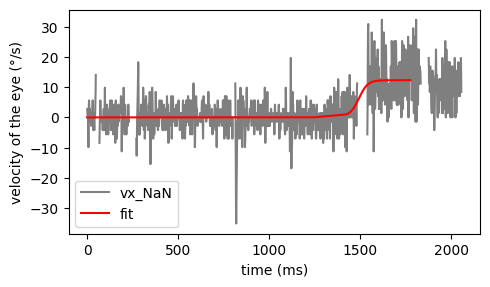

In [1]:
import ANEMO

Processing = ANEMO.ProcessingSmoothPursuit(dirpath='dataANEMO', sub='001')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'vx_NaN' # The velocity of the eye de-saccade in deg/sec
trial = 8 # Number of the trial to be transformed
expname = 'sub-001' # Name of the particular experience to be transformed
                    # or list(PreProcessing.data.keys())[0]
model = ANEMO.Model.SmoothPursuit.velocity_sigmo # model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.SmoothPursuit
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(eventName_TargetOn='TargetOn',
                           eventName_StimulusOff='StimulusOff',
                           eventName_dir_target='dir_target',
                           ref_time='time',
                           do_whitening=False) 
toxname = None # Name of the data to be saved
return_ = True # If True returns the value, else saves it in results and data

#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Fit = Processing.Trial.Fit(xname=xname,
                           trial=trial,
                           expname=expname,
                           model=model,
                           generate_params=generate_params,
                           stime=stime,
                           etime=etime,
                           step_fit=step_fit,
                           arg_generate_params=arg_generate_params,
                           toxname=toxname,
                           return_=return_)
print(Fit)

#------------------------------------------------------------------------------
# to retrieve the raw data:
#------------------------------------------------------------------------------
data_exp = Processing.data[expname]
data = data_exp.Data
vx_NaN = data[data.trial==trial][xname].values

#------------------------------------------------------------------------------
# Plot:
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(10/2, 10/(1.681*2)))

axs.plot(vx_NaN, 'k', alpha=.5, label='vx_NaN')
axs.plot(Fit['fit'], 'r', label='fit')
axs.set_xlabel('time (ms)')
axs.set_ylabel('velocity of the eye (°/s)')
axs.legend()

plt.tight_layout()
plt.show()

## Run it on a data set

----------------------------

In [2]:
import ANEMO

Processing = ANEMO.ProcessingSmoothPursuit(dirpath='dataANEMO', sub='001')

#------------------------------------------------------------------------------
# Parameters:
#------------------------------------------------------------------------------
xname = 'vx_NaN' # The velocity of the eye de-saccade in deg/sec
model = ANEMO.Model.SmoothPursuit.velocity_sigmo # Model equation
# Function generating parameters to perform the fitting
generate_params = ANEMO.GenerateParams.SmoothPursuit
stime = None # Start time of the fitting
etime = -280 # End time of the fitting
step_fit = 2 # Number of steps for the fit
# Dictionary containing the parameters for the generate_params function
arg_generate_params = dict(eventName_TargetOn='TargetOn',
                           eventName_StimulusOff='StimulusOff',
                           eventName_dir_target='dir_target',
                           ref_time='time',
                           do_whitening=False) 
toxname = None # Name of the data to be saved
expnames = 'sub-001' # Name of the particular experience to be transformed
                     # or list(PreProcessing.data.keys())[0]
trials = trials = list(range(1, 16)) # List of the trial to be transformed
recalculate = False # Allows you to indicate if you want to force the
                    # calculation on the trials already processed
    
#------------------------------------------------------------------------------
# to apply the function:
#------------------------------------------------------------------------------
Processing.Data.Fit(xname=xname,
                    model=model,
                    generate_params=generate_params,
                    stime=stime,
                    etime=etime,
                    step_fit=step_fit,
                    arg_generate_params=arg_generate_params,
                    toxname=toxname,
                    expnames=expnames,
                    trials=trials,
                    recalculate=recalculate)

calculates Fit_velocity_sigmo from the file sub-001... finished
save data... finished
